# 서울시 구별 CCTV 현황 분석

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### CCTV 데이터 파악하고 정리하기

In [2]:
cctv = pd.read_excel('./data/서울시 자치구 년도별 CCTV 설치 현황(2011년 이전_2018년).xlsx')
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
# Nan 이 있는지 확인
cctv.isnull().values.any()

True

In [4]:
cctv.fillna(0, inplace=True)
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [5]:
# Nan 이 있는지 확인하는 또다른 방법
cctv.isnull().any().any()

False

In [6]:
cctv.rename({'기관명': '구별'}, inplace=True, axis=1)
cctv['2015년_이전'] = cctv['2011년 이전'] + cctv['2012년'] + cctv['2013년'] + cctv['2014년'] + cctv['2015년']
cctv.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년_이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,3431.0
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,1027.0
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,691.0
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,909.0
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,2001.0


In [7]:
cctv['구별'] = cctv['구별'].map(lambda s: s.replace(' ', ''))
cctv.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년_이전
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,3431.0
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,1027.0
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,691.0
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,909.0
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,2001.0


In [8]:
cctv['구별'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [9]:
del cctv['2011년 이전']
del cctv['2012년']
del cctv['2013년']
del cctv['2014년']
del cctv['2015년']
cctv = cctv[['구별', '소계', '2015년_이전', '2016년', '2017년', '2018년']]
cctv.tail()

,구별,소계,2015년_이전,2016년,2017년,2018년
20,용산구,2063,1841.0,89,60,73
21,은평구,2962,2070.0,296,229,367
22,종로구,1471,941.0,148,281,101
23,중구,1544,629.0,270,317,328
24,중랑구,1068,872.0,121,66,9


In [10]:
cctv = cctv.astype({'2015년_이전': int})
cctv.tail()

,구별,소계,2015년_이전,2016년,2017년,2018년
20,용산구,2063,1841,89,60,73
21,은평구,2962,2070,296,229,367
22,종로구,1471,941,148,281,101
23,중구,1544,629,270,317,328
24,중랑구,1068,872,121,66,9


In [11]:
# 최근 3년간 증가율
cctv['최근증가율'] = (cctv['2016년'] + cctv['2017년'] + cctv['2018년']) / cctv['2015년_이전'] * 100
cctv.tail()

,구별,소계,2015년_이전,2016년,2017년,2018년,최근증가율
20,용산구,2063,1841,89,60,73,12.058664
21,은평구,2962,2070,296,229,367,43.091787
22,종로구,1471,941,148,281,101,56.323061
23,중구,1544,629,270,317,328,145.468998
24,중랑구,1068,872,121,66,9,22.477064


In [12]:
# 최근 3년간 증가율이 높은 구
cctv.sort_values('최근증가율', ascending=False).head()

,구별,소계,2015년_이전,2016년,2017년,2018년,최근증가율
23,중구,1544,629,270,317,328,145.468998
19,영등포구,2495,1042,289,371,793,139.443378
15,성동구,2679,1251,201,933,294,114.148681
7,금천구,1634,769,136,199,530,112.483745
5,광진구,1581,746,21,468,346,111.930295


In [13]:
# CCTV 대수가 작은 구
cctv.sort_values('소계').head()

,구별,소계,2015년_이전,2016년,2017년,2018년,최근증가율
9,도봉구,858,515,155,117,71,66.601942
24,중랑구,1068,872,121,66,9,22.477064
2,강북구,1265,691,254,1,319,83.068017
22,종로구,1471,941,148,281,101,56.323061
23,중구,1544,629,270,317,328,145.468998


### 인구 현황 데이터 파악하고 정리하기

In [14]:
pop = pd.read_csv('./data/서울시 인구현황(2020 3분기).tsv', sep='\t', header=2)
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.20,"1,552,356"
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"


In [15]:
del pop['기간']
del pop['세대']
del pop['남자']
del pop['남자.1']
del pop['남자.2']
del pop['여자']
del pop['여자.1']
del pop['여자.2']
del pop['세대당인구']
pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [16]:
pop.rename({'자치구': '구별', '계': '인구수', '계.1': '내국인', '계.2': '외국인',
            '65세이상고령자': '고령자'}, inplace=True, axis=1)
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [17]:
pop['인구수'] = pop['인구수'].map(lambda s: int(s.replace(',','')))
pop['내국인'] = pop['내국인'].map(lambda s: int(s.replace(',','')))
pop['외국인'] = pop['외국인'].map(lambda s: int(s.replace(',','')))
pop['고령자'] = pop['고령자'].map(lambda s: int(s.replace(',','')))
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [18]:
# 합계행 제거
pop.drop([0], inplace=True)
pop.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [19]:
pop['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [20]:
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100
pop.tail()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
21,관악구,514555,498574,15981,78206,3.105790,15.198764
22,서초구,429995,426009,3986,59495,0.926988,13.836207
23,강남구,544085,539235,4850,73942,0.891405,13.590156
24,송파구,676673,670331,6342,92149,0.937233,13.617951
25,강동구,462275,458058,4217,68798,0.912228,14.882483


In [21]:
# 외국인 비율이 높은 구
pop.sort_values('외국인비율', ascending=False).head(5)

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
2,중구,135321,125800,9521,24265,7.035863,17.931437
18,금천구,249641,232157,17484,39361,7.003657,15.767041
17,구로구,435751,405579,30172,69312,6.924138,15.906332
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [22]:
# 고령자 비율이 높은 구
pop.sort_values('고령자비율', ascending=False).head(5)

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
9,강북구,313550,309996,3554,62951,1.133472,20.076862
10,도봉구,329300,327248,2052,61388,0.623140,18.641968
2,중구,135321,125800,9521,24265,7.035863,17.931437
1,종로구,159842,149952,9890,28396,6.187360,17.765043
12,은평구,485842,481546,4296,84353,0.884238,17.362229


### CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [23]:
df = pd.merge(cctv, pop, on='구별')
df.head()

,구별,소계,2015년_이전,2016년,2017년,2018년,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,3431,765,577,448,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,1027,194,273,385,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,691,254,1,319,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,909,190,264,254,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,2001,619,694,671,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [24]:
del df['2015년_이전']
del df['2016년']
del df['2017년']
del df['2018년']
df.tail()

,구별,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
20,용산구,2063,12.058664,244953,229786,15167,39995,6.191800,16.327622
21,은평구,2962,43.091787,485842,481546,4296,84353,0.884238,17.362229
22,종로구,1471,56.323061,159842,149952,9890,28396,6.187360,17.765043
23,중구,1544,145.468998,135321,125800,9521,24265,7.035863,17.931437
24,중랑구,1068,22.477064,400989,395997,4992,68658,1.244922,17.122165


In [25]:
df.set_index('구별', inplace=True)
df.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


#### 상관관계 분석

In [26]:
# 고령자 비율과 CCTV 댓수
np.corrcoef(df['고령자비율'], df['소계'])

array([[ 1.        , -0.45361392],
       [-0.45361392,  1.        ]])

In [27]:
# 외국인 비율과 CCTV 댓수
np.corrcoef(df['외국인비율'], df['소계'])

array([[ 1.        , -0.06150919],
       [-0.06150919,  1.        ]])

In [28]:
# 인구수와 CCTV 댓수
np.corrcoef(df['인구수'], df['소계'])

array([[1.        , 0.38021221],
       [0.38021221, 1.        ]])

### CCTV 현황 그래프로 분석하기

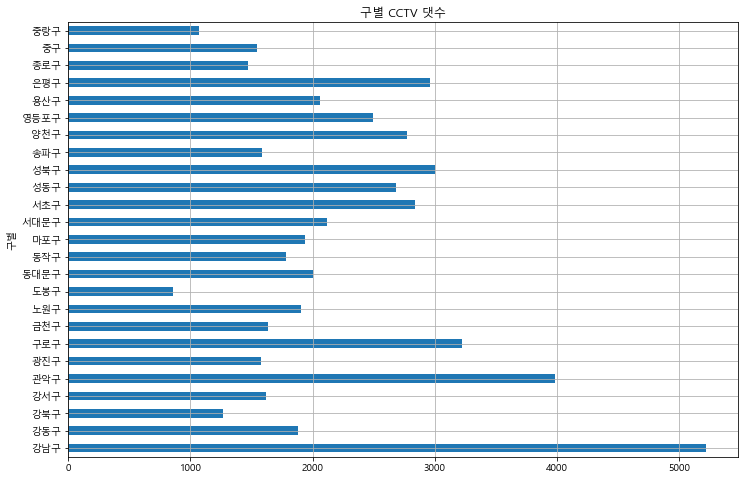

In [29]:
df['소계'].plot(kind='barh', grid=True, figsize=(12,8), title='구별 CCTV 댓수')
plt.show()

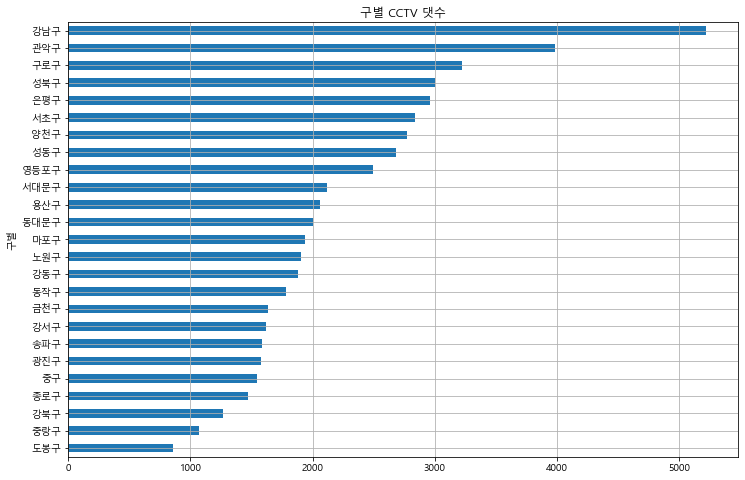

In [30]:
df['소계'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 CCTV 댓수')
plt.show()

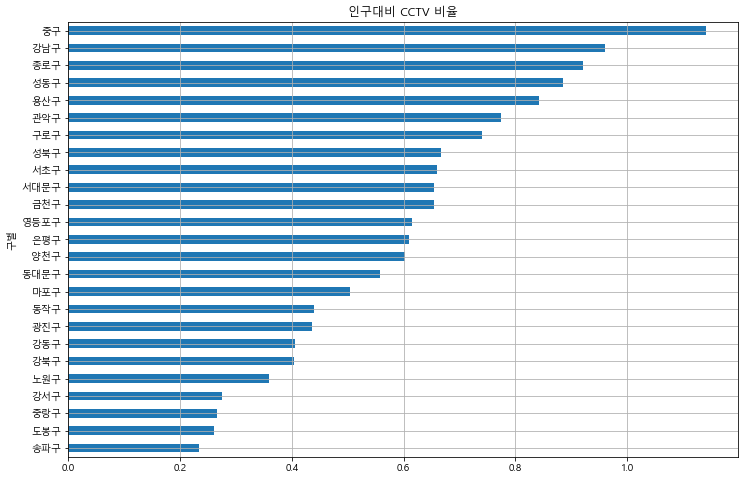

In [31]:
# 인구대비 CCTV 비율
df['cctv비율'] = df['소계'] / df['인구수'] * 100
df['cctv비율'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('인구대비 CCTV 비율')
plt.show()

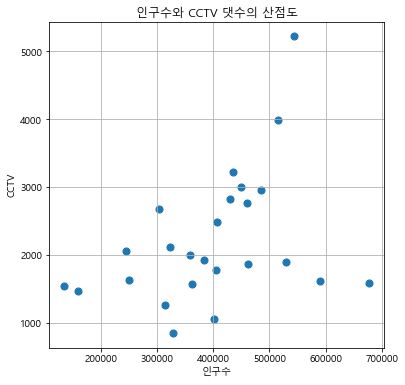

In [32]:
# 인구수와 CCTV 댓수의 산점도
plt.figure(figsize=(6,6))
plt.scatter(df['인구수'], df['소계'], s=50)
plt.grid(True)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [33]:
# 산점도 위에 상관관계를 나타내는 선 그리기
fp1 = np.polyfit(df['인구수'], df['소계'], 1)
fp1

array([2.89293854e-03, 1.06798227e+03])

In [34]:
fx = np.array([100000, 700000])
f1 = np.poly1d(fp1)
fy = f1(fx)
fy

array([1357.27612119, 3093.0392448 ])

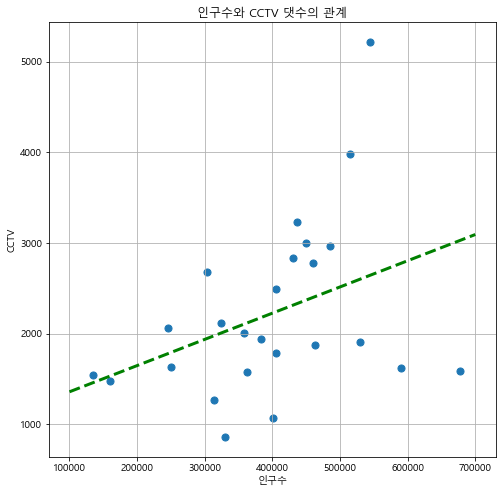

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(df['인구수'], df['소계'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')
plt.grid(True)
plt.title('인구수와 CCTV 댓수의 관계')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

In [36]:
df['오차'] = np.abs(df['소계'] - f1(df['인구수']))
df_sort = df.sort_values('오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
송파구,1586,62.833676,676673,670331,6342,92149,0.937233,13.617951,0.234382,1439.555667
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
도봉구,858,66.601942,329300,327248,2052,61388,0.623140,18.641968,0.260553,1162.626928
중랑구,1068,22.477064,400989,395997,4992,68658,1.244922,17.122165,0.266341,1160.018799


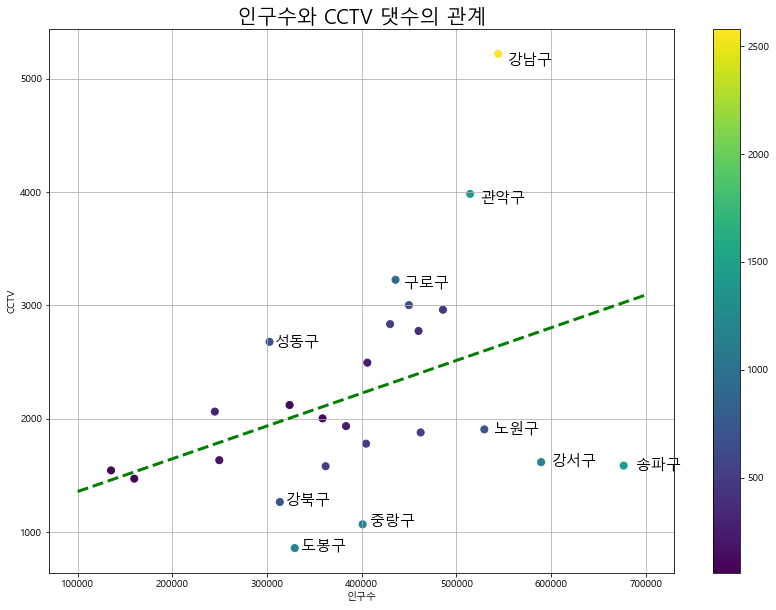

In [37]:
plt.figure(figsize=(14,10))
plt.scatter(df['인구수'], df['소계'], c=df['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(df_sort['인구수'][i]*1.02, df_sort['소계'][i]*0.98,
             df_sort.index[i], fontsize=15)

plt.grid(True)
plt.title('인구수와 CCTV 댓수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()

In [38]:
df.to_csv('./results/01.cctv.csv')